In [1]:
import pandas as pd
import numpy as np

# Data

In [2]:
df= pd.read_csv('sms_spam_collection.csv')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Preprocessing 1

* lower case
* contraction
* remove/convert number
* remove punctuation
* remove white space
* remove stopwords and aprticular words

### Convert to Lower Case

In [5]:
def to_lower(text):
    return text.lower()

In [6]:
contoh= 'Summer December 10th 2019'
print(to_lower(contoh))

summer december 10th 2019


### Contraction

In [7]:
# !pip install nltk

In [8]:
import re

In [9]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [10]:
def expand_contraction(text, contractions_dict):
    contractions_pattern= re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                     flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match=contraction.group(0)
        first_char=match[0]
        expanded_contraction= contractions_dict.get(match) \
            if contractions_dict.get(match)\
            else contractions_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction
    
    expanded_text= contractions_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text= expand_contraction(text,contractions_dict)
    return text

In [12]:
contoh= "if i ain't got you, he won't"
print(main_contraction(contoh))

if i am not got you, he will not


### Remove or Convert Number

In [13]:
def remove_number(text):
    output= ''.join(c for c in text if not c.isdigit())
    return output

In [14]:
contoh='i was born in 1996.'
remove_number(contoh)

'i was born in .'

### Remove Punctuation

In [17]:
from string import punctuation

In [18]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [21]:
contoh='there was bobby, alec, and i.'
remove_punct(contoh)

'there was bobby alec and i'

### Remove Whitespace

In [22]:
def to_strip(text):
    return ' '.join(text.split())

In [23]:
contoh= 'there    was bobby   alex and me '
to_strip(contoh)

'there was bobby alex and me'

### Remove Stopwords or Particular Words

In [25]:
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brigi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
# stopwords.words('english')

In [29]:
def remove_stopwords(text):
    stop_word= stopwords.words('english')
    return ' '.join(w for w in nltk.word_tokenize(text) if not w in stop_word)

In [30]:
contoh= 'there was bobby alex and i'
remove_stopwords(contoh)

'bobby alex'

In [34]:
# [w for w in contoh.split() if not w in stopwords.words('english')] # word_tokenize fungsinya mirip split(), 
# membagi string menjadi list berisi kata

['bobby', 'alex']

### Combine preprocessing methods

In [36]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df['prep1']=df['message'].apply(to_lower)
df['prep2']=df['prep1'].apply(main_contraction)
df['prep3']=df['prep2'].apply(remove_number)
df['prep4']=df['prep3'].apply(remove_punct)
df['prep5']=df['prep4'].apply(to_strip)
df['prep6']=df['prep5'].apply(remove_stopwords)

In [48]:
pd.options.display.max_colwidth=None
df.head()

,label,message,prep1,prep2,prep3,prep4,prep5,prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though


# Preprocessing 2

### Stemming
optional  
The process of transforming to the **root word**.  
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.  
We need stemming because treating them as the same words will reduce overfitting.

In [50]:
from nltk.stem import SnowballStemmer

In [63]:
stemmer= SnowballStemmer('english')
def stem(text):
    stemmed_words=[stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
#     stemmed_words=[stemmer.stem(word) for word in text.split()]
    return " ".join(stemmed_words)

In [62]:
print(df['prep6'][8])
stem(df['prep6'][8])

winner valued network customer selected receivea £ prize reward claim call claim code kl valid hours


'winner valu network custom select receivea £ prize reward claim call claim code kl valid hour'

In [64]:
contoh= 'i am reading a very fascinating book'
stem(contoh)

'i am read a veri fascin book'

### Lemmatization  
The process of transforming to the **dictionary base form.**  
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.  
caringly and carefully are listed in the dictionary.  
purpose of lemmatization is also to reduce overfitting. 

In [65]:
from nltk.stem import WordNetLemmatizer

In [66]:
# nltk.download('wordnet')

In [67]:
lemma=WordNetLemmatizer()

In [68]:
def lemmatize(text):
    lemmatize_words=[lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    #lemmatize_words=[lemma.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatize_words)


In [69]:
print(df['prep6'][8])
lemmatize(df['prep6'][8])

winner valued network customer selected receivea £ prize reward claim call claim code kl valid hours


'winner valued network customer selected receivea £ prize reward claim call claim code kl valid hour'

In [71]:
lemmatize(contoh)

'i am reading a very fascinating book'

In [72]:
contoh= 'there she goes here i am'
lemmatize(contoh)

'there she go here i am'

### Apply Stemming and Lemmatization

In [75]:
df['stem']=df['prep6'].apply(stem)
df['lemma']=df['prep6'].apply(lemmatize)

In [77]:
df[['prep6','stem','lemma']].head()

,prep6,stem,lemma
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


# Text Data Exploration

In [79]:
# !pip install wordcloud

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

### Word frequency

In [81]:
def kamus(check):
    check= check.str.extractall('([a-zA-Z]+)')
    check.columns=['check']
    b=check.reset_index(drop=True)
    check= b['check'].value_counts()
    
    kamus={'kata':check.index, 'freq':check.values}
    kamus=pd.DataFrame(kamus)
    kamus.index=kamus['kata']
    kamus.drop('kata',axis=1,inplace=True)
    kamus.sort_values('freq',ascending=False, inplace=True)
    return kamus

In [83]:
kamus_clean=kamus(df['lemma'])

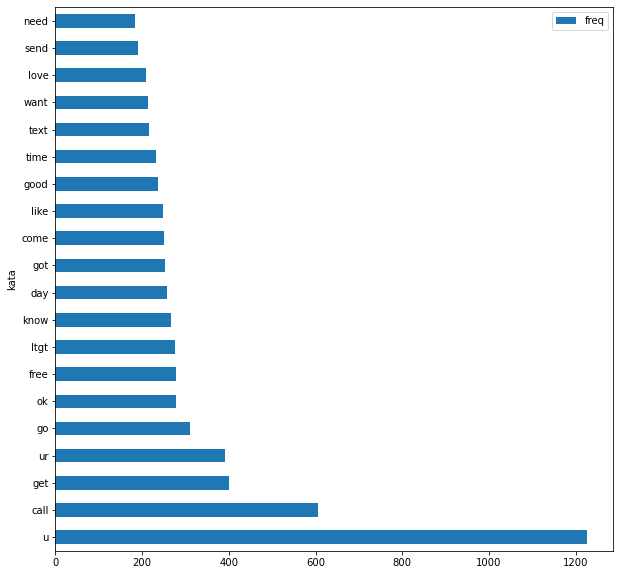

In [85]:
kamus_clean[:20].plot(kind='barh',figsize=(10,10))
# bisa dicoba 'u' ditambahkan sebagai stopwords

### Word cloud

In [87]:
from wordcloud import WordCloud

In [88]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud) #memuncukkan data wordcloud
    plt.axis('off')#tidak ada axis

In [90]:
word_cloud=WordCloud().generate(str(df['lemma']))

In [91]:
word_cloud

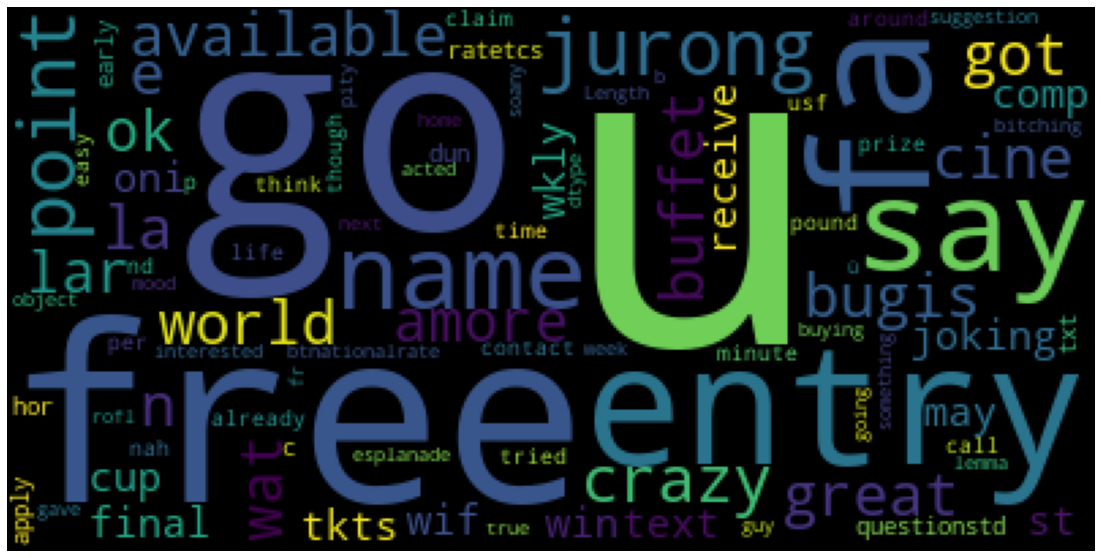

In [92]:
plot_cloud(word_cloud)

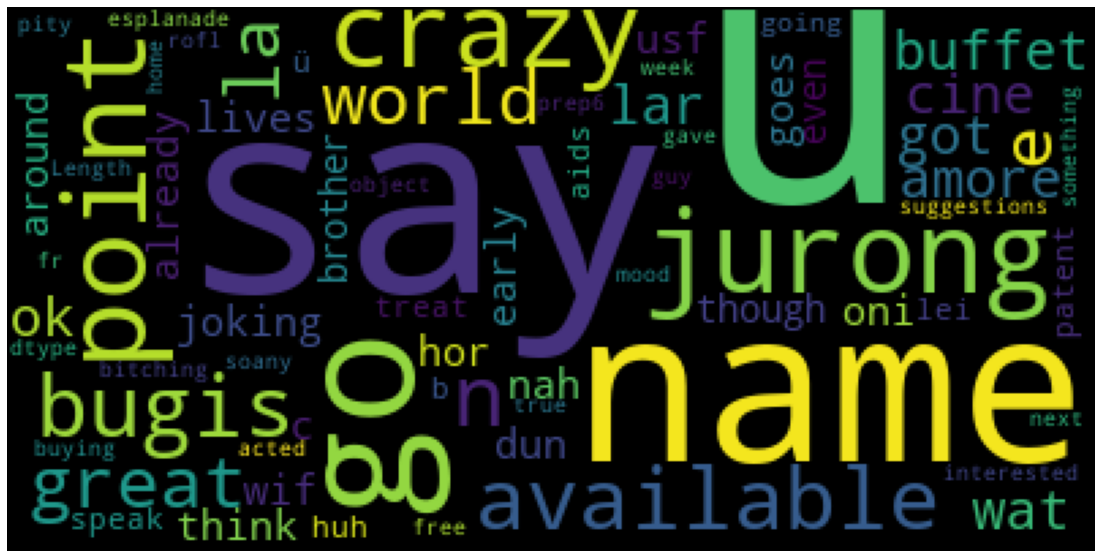

In [95]:
# ham
word_cloud= WordCloud().generate(str(df[df['label']=='ham']['prep6']))
plot_cloud(word_cloud)

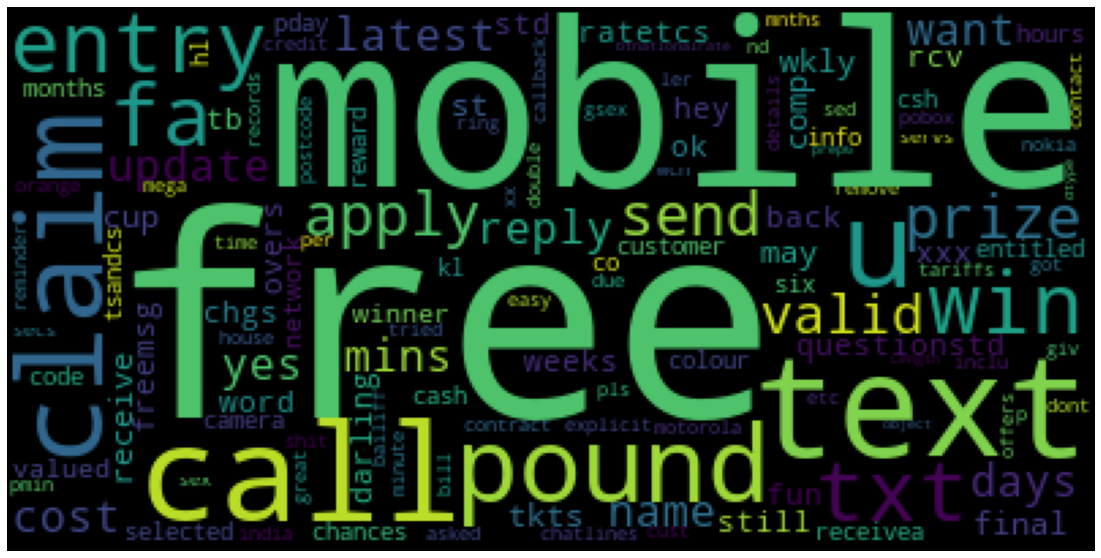

In [96]:
# spam
word_cloud= WordCloud().generate(str(df[df['label']=='spam']['prep6']))
plot_cloud(word_cloud)

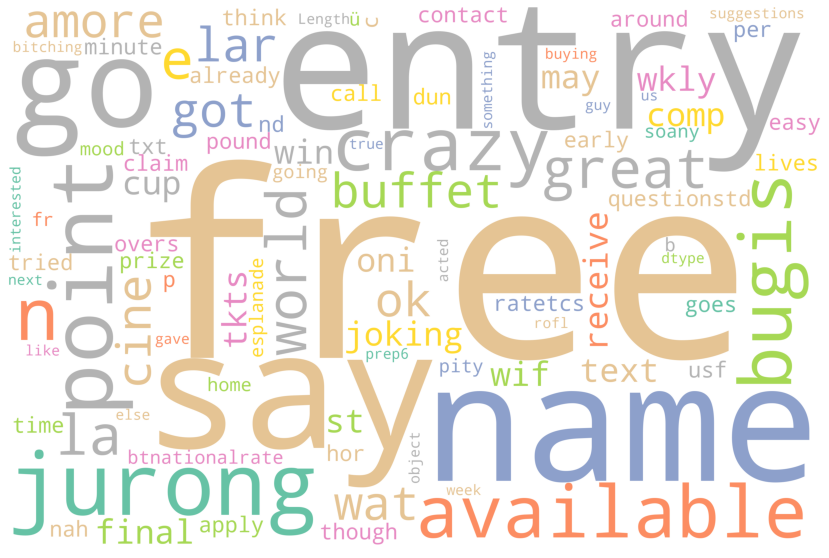

In [98]:
word_cloud= WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='Set2',
                     collocations=False, stopwords=['u','fa']).generate(str(df['prep6']))
plot_cloud(word_cloud)

### Length of Sentence

In [100]:
df['len']=df['message'].apply(len)
df_spam= df[df['label']=='spam']
df_ham=df[df['label']=='ham']

In [101]:
df[['message','len']]

,message,len
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives around here though",61
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",160
5568,Will ü b going to esplanade fr home?,36
5569,"Pity, * was in mood for that. So...any other suggestions?",57
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125


In [114]:
# plt.figure(figsize=(10,10))
# sns.histplot(data=df, x='len',kde=True, hue='label')
# # sns.histplot(df_ham['len'], kde=True)

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


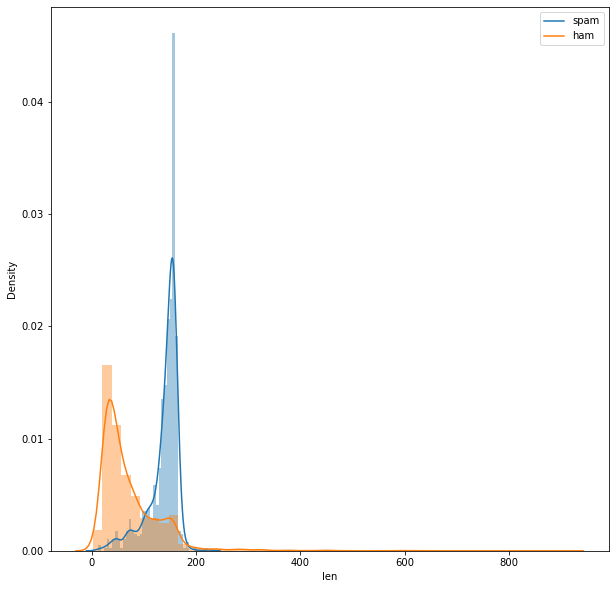

In [116]:
plt.figure(figsize=(10,10))
sns.distplot(df_spam['len'])
sns.distplot(df_ham['len'])
plt.legend(['spam','ham'])
plt.show()

In [118]:
df2=df.loc[df['len']<400]
df_spam= df2[df2['label']=='spam']
df_ham=df2[df2['label']=='ham']

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


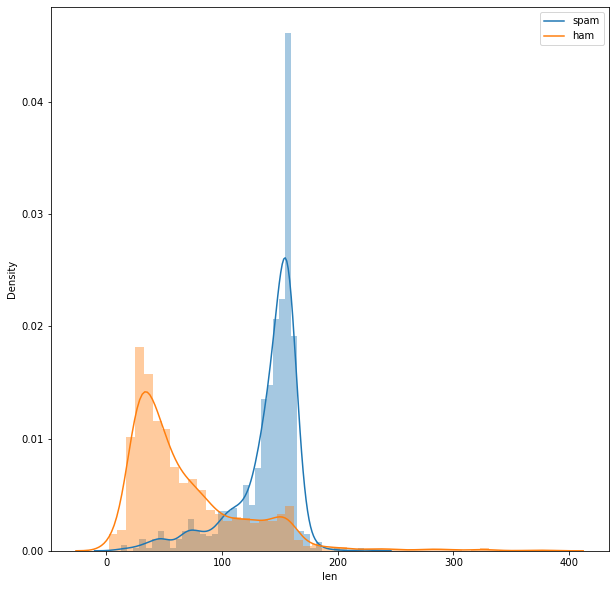

In [119]:
plt.figure(figsize=(10,10))
sns.distplot(df_spam['len'])
sns.distplot(df_ham['len'])
plt.legend(['spam','ham'])
plt.show()

# Document Term Matrix (DTM)
### Term Frequency (TF)
- Frequency term in the document
- i.e. if the word appears twice, the frequency in the vector will be 2

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
contoh= ["you already know me, don't you","i am the best there is"]

In [123]:
vect=CountVectorizer()
vect.fit(contoh)

CountVectorizer()

In [131]:
vect.vocabulary_.keys() # ada kata apa saja yang muncul di corpus

dict_keys(['you', 'already', 'know', 'me', 'don', 'am', 'the', 'best', 'there', 'is'])

In [127]:
len(vect.vocabulary_) #ada berapa kata di vocabulary

10

In [133]:
vect.transform(contoh).toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [137]:
vect.get_feature_names_out()

array(['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there',
       'you'], dtype=object)

In [138]:
dtm=pd.DataFrame(vect.transform(contoh).toarray(), columns=vect.get_feature_names_out())
dtm

,already,am,best,don,is,know,me,the,there,you
0,1,0,0,1,0,1,1,0,0,2
1,0,1,1,0,1,0,0,1,1,0


In [139]:
contoh

["you already know me, don't you", 'i am the best there is']

### N-grams
With the method above, these two sentences will have the same tokenization.
- It’s bad, not good at all
- It’s good, not bad at all

use n-grams

In [140]:
contoh

["you already know me, don't you", 'i am the best there is']

In [164]:
vect=CountVectorizer(ngram_range=(1,2))
vect.fit(contoh)

CountVectorizer(ngram_range=(1, 2))

In [165]:
dtm2=pd.DataFrame(vect.transform(contoh).toarray(), columns=vect.get_feature_names_out())

In [166]:
dtm2

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0


### Term Frequency-Inverse Document Frequency (TF-IDF)
rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training %set_env

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [168]:
contoh

["you already know me, don't you", 'i am the best there is']

In [169]:
tfidf=TfidfVectorizer()# bisa pakai ngram_range juga
tfidf.fit(contoh)

TfidfVectorizer()

In [170]:
pd.DataFrame(tfidf.transform(contoh).toarray(), columns=tfidf.get_feature_names_out())

,already,am,best,don,is,know,me,the,there,you
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000


## Make DTM

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
text= df['lemma']
y=np.where(df['label']=='spam',1,0)

In [174]:
y.sum()/len(y)

0.13406317300789664

In [175]:
#split
text_train, text_test, y_train, y_test= train_test_split(text, y, stratify=y,random_state=2020)

In [176]:
vect=CountVectorizer().fit(text_train)
x_train= vect.transform(text_train)
x_test= vect.transform(text_test)

In [177]:
print('x_train size', repr(x_train))

x_train size <4179x6838 sparse matrix of type '<class 'numpy.int64'>'
	with 33610 stored elements in Compressed Sparse Row format>


In [178]:
features= vect.get_feature_names_out()

In [179]:
features[:10]

array(['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere',
       'ab', 'abbey', 'abdomen', 'abeg'], dtype=object)

## Modelling Benchmark

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [182]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       0.99      0.81      0.89       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



## Model with TF-IDF

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [185]:
tfidf= TfidfVectorizer()
model= LogisticRegression()
pipe= Pipeline([('preprocess', tfidf),
               ('model',model)])

In [186]:
hyperparam_space= {'model__C':[0.001,0.01,0.1,1,10]}

In [187]:
grid=GridSearchCV(pipe, hyperparam_space, cv= StratifiedKFold(n_splits=5))

In [188]:
grid.fit(text_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [189]:
print(grid.best_score_, grid.best_params_)

0.9753545540497953 {'model__C': 10}


## Before vs After

In [190]:
# before
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1206
           1       0.99      0.81      0.89       187

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [191]:
# after
best_model= grid.best_estimator_.fit(text_train,y_train)
y_pred2= best_model.predict(text_test)

In [194]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       0.98      0.84      0.90       187

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.97      1393



# Latihan
https://www.kaggle.com/venky73/spam-mails-dataset

Lakukan text exploration untuk spam_ham dataset

* Buatlah model untuk memprediksi apakah suatu email merupakan email spam atau bukan.
* Tentukan metric yang sesuai.
* Carilah model terbaik yang kalian bisa.